<a href="https://colab.research.google.com/github/Miranbaradei/deeplearning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 Image Preprocessing

# Loading dataset

In [ ]:
import os

project_path = r'C:\Users\miran\Downloads\Projectimage'
print(os.listdir(project_path))


['combined_feature_matrix.npy', 'combined_labels.npy', 'dataset', 'image_paths.npy', 'pca_100_features.npy', 'pca_150_features.npy', 'pca_50_features.npy', 'Project.ipynb']


In [ ]:
dataset_path = r'C:/Users/miran/Downloads/Projectimage/dataset/training_set'

samples_per_class = 3
class_names = sorted([
    d for d in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, d))
])

num_classes = len(class_names)

print("Number of classes:", num_classes)
print("Classes:", class_names)


Number of classes: 10
Classes: ['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers', 'foods', 'horses', 'monuments', 'mountains_and_snow', 'peolpe_and_villages_in_Africa']


In [ ]:
print(os.listdir(r'C:\Users\miran\Downloads\Projectimage\dataset\training_set'))
print(os.listdir(r'C:\Users\miran\Downloads\Projectimage\dataset\test_set'))
print(os.listdir(r'C:\Users\miran\Downloads\Projectimage\dataset'))



['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers', 'foods', 'horses', 'monuments', 'mountains_and_snow', 'peolpe_and_villages_in_Africa']
['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers', 'foods', 'horses', 'monuments', 'mountains_and_snow', 'peolpe_and_villages_in_Africa']
['test_set', 'training_set']


In [ ]:
import os

print("Current working directory:", os.getcwd())
print("Files and folders here:", os.listdir())


Current working directory: c:\Users\miran\Downloads\Projectimage
Files and folders here: ['combined_feature_matrix.npy', 'combined_labels.npy', 'dataset', 'image_paths.npy', 'pca_100_features.npy', 'pca_150_features.npy', 'pca_50_features.npy', 'Project.ipynb']


2. Resize each image to a fixed dimension using a valid resizing technique.
3. Convert each image to:

o RGB

o Grayscale

Display several processed images as samples.

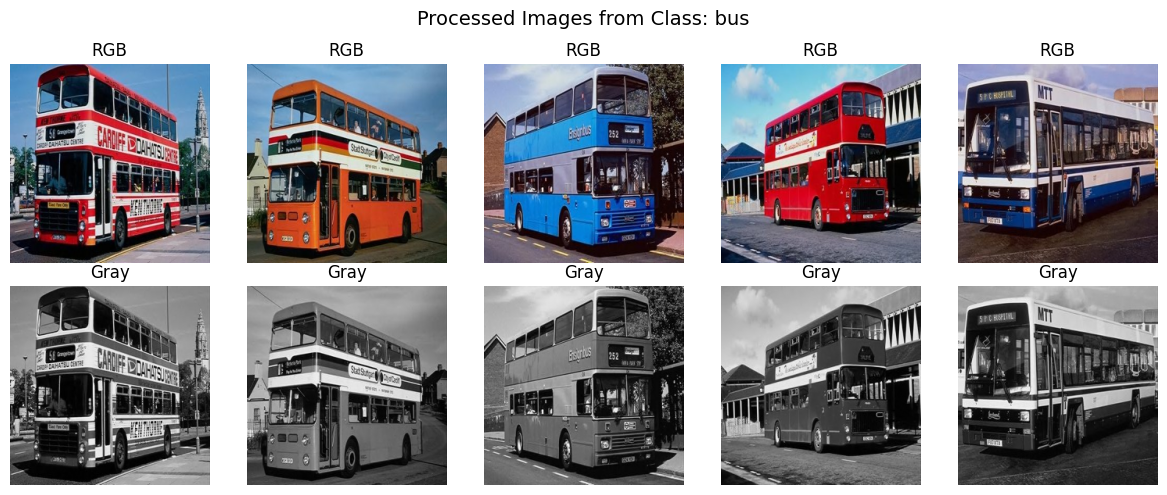

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

dataset_path = r'C:/Users/miran/Downloads/Projectimage/dataset/training_set'
IMG_SIZE = (256, 256)
samples_to_show = 5
processed_rgb = []
processed_gray = []

first_class = sorted(os.listdir(dataset_path))[1]
first_class_path = os.path.join(dataset_path, first_class)

image_files = sorted([
    f for f in os.listdir(first_class_path)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
])

image_files = image_files[:samples_to_show]

for img_name in image_files:
    img_path = os.path.join(first_class_path, img_name)
    img = cv.imread(img_path)

    if img is None:
        continue

    # resize
    img_resized = cv.resize(img, IMG_SIZE, interpolation=cv.INTER_AREA)

    # Convert to RGB
    rgb_img = cv.cvtColor(img_resized, cv.COLOR_BGR2RGB)

    # Convert to Gray
    gray_img = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)

    processed_rgb.append(rgb_img)
    processed_gray.append(gray_img)


plt.figure(figsize=(12, 5))

for i in range(samples_to_show):
    # RGB
    plt.subplot(2, samples_to_show, i + 1)
    plt.imshow(processed_rgb[i])
    plt.title("RGB")
    plt.axis("off")

    # Gray
    plt.subplot(2, samples_to_show, samples_to_show + i + 1)
    plt.imshow(processed_gray[i], cmap='gray')
    plt.title("Gray")
    plt.axis("off")

plt.suptitle(f"Processed Images from Class: {first_class}", fontsize=14)
plt.tight_layout()
plt.show()


# 3.2 Feature Extraction

## 1. Color Features – RGB Histogram

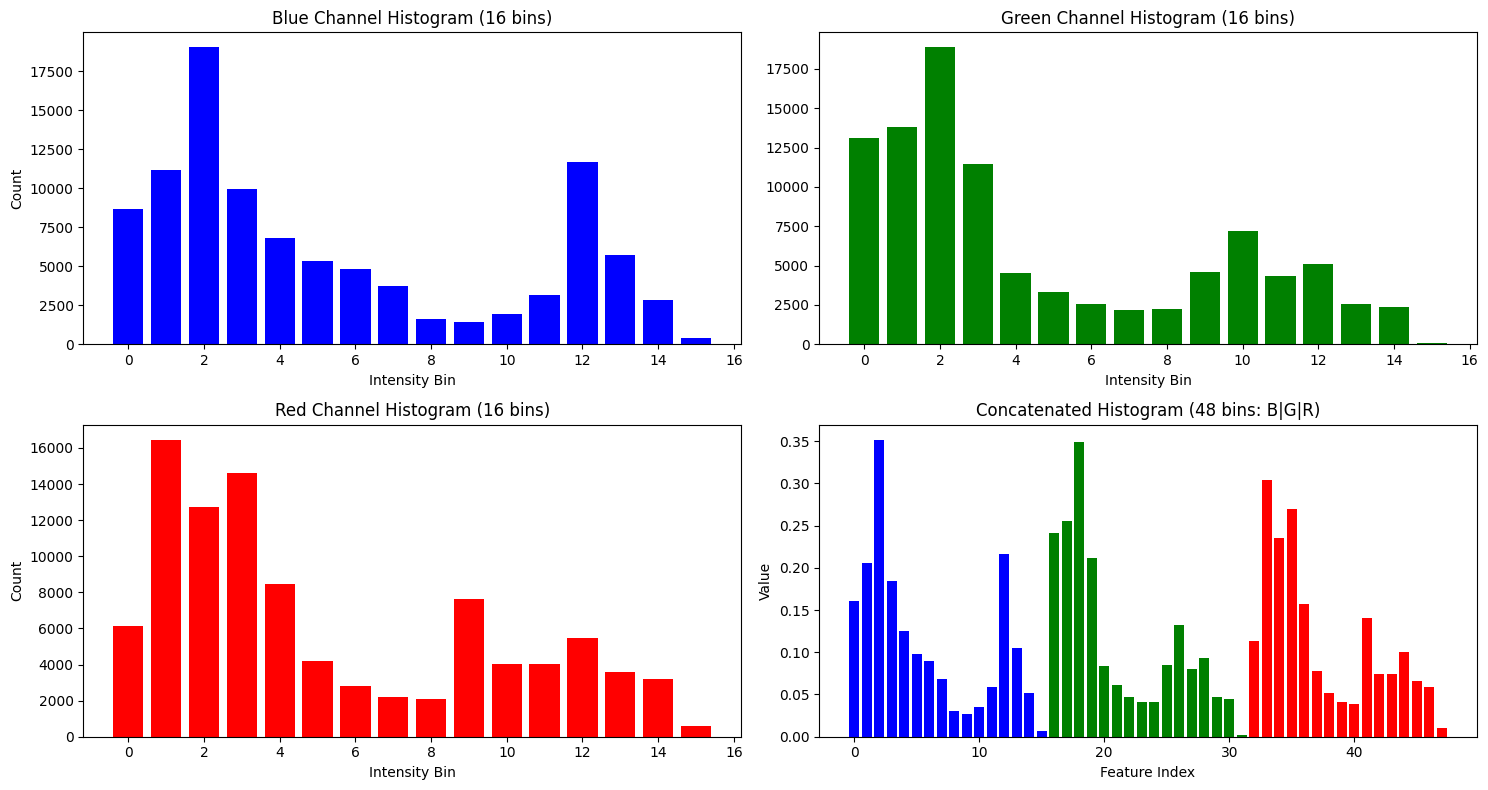

In [ ]:
b, g, r= cv.split(img)

# Compute 16-bin histograms for each channel
hist_b = cv.calcHist([b], [0], None, [16], [0, 256]).flatten()
hist_g = cv.calcHist([g], [0], None, [16], [0, 256]).flatten()
hist_r = cv.calcHist([r], [0], None, [16], [0, 256]).flatten()

# Concatenate into a 48 feature vector
hist_concat = np.concatenate([hist_b, hist_g, hist_r])
hist_concat = hist_concat / np.linalg.norm(hist_concat)

# X-axis for the 16-bin histograms
bins16 = np.arange(16)

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.bar(bins16, hist_b, color="blue")
plt.title("Blue Channel Histogram (16 bins)")
plt.xlabel("Intensity Bin")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
plt.bar(bins16, hist_g, color="green")
plt.title("Green Channel Histogram (16 bins)")
plt.xlabel("Intensity Bin")

plt.subplot(2, 2, 3)
plt.bar(bins16, hist_r, color="red")
plt.title("Red Channel Histogram (16 bins)")
plt.xlabel("Intensity Bin")
plt.ylabel("Count")

plt.subplot(2, 2, 4)
plt.bar(np.arange(48), hist_concat, color=(["blue"]*16 + ["green"]*16 + ["red"]*16))
plt.title("Concatenated Histogram (48 bins: B|G|R)")
plt.xlabel("Feature Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

In [ ]:
import cv2 as cv
import numpy as np

def extract_rgb_histogram(img, bins_per_channel=8):
    rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    hist = cv.calcHist(
        [rgb],
        [0, 1, 2],
        None,
        [bins_per_channel]*3,
        [0, 256, 0, 256, 0, 256]
    )
    hist = hist.flatten().astype("float32")
    hist /= (hist.sum() + 1e-7)
    return hist


In [ ]:
def extract_rgb_histogram(img, bins_per_channel=8):
    rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    hist = cv.calcHist([rgb], [0, 1, 2], None, [bins_per_channel]*3, [0,256, 0,256, 0,256])
    hist = hist.flatten().astype("float32")
    hist /= (hist.sum() + 1e-7)
    return hist


In [ ]:
color_features = []
color_labels = []
color_paths = []

for cls in class_names:
    class_folder = os.path.join(dataset_path, cls)
    image_files = sorted([
        f for f in os.listdir(class_folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ])
    for fname in image_files:
        img_path = os.path.join(class_folder, fname)
        img = cv.imread(img_path)
        if img is None:
            continue
        img = cv.resize(img, IMG_SIZE, interpolation=cv.INTER_AREA)
        feat = extract_rgb_histogram(img, bins_per_channel=8)
        color_features.append(feat)
        color_labels.append(cls)
        color_paths.append(img_path)

color_features = np.array(color_features, dtype=np.float32)

print("Total images:", len(color_paths))
print("Color feature shape:", color_features.shape)


Total images: 900
Color feature shape: (900, 512)


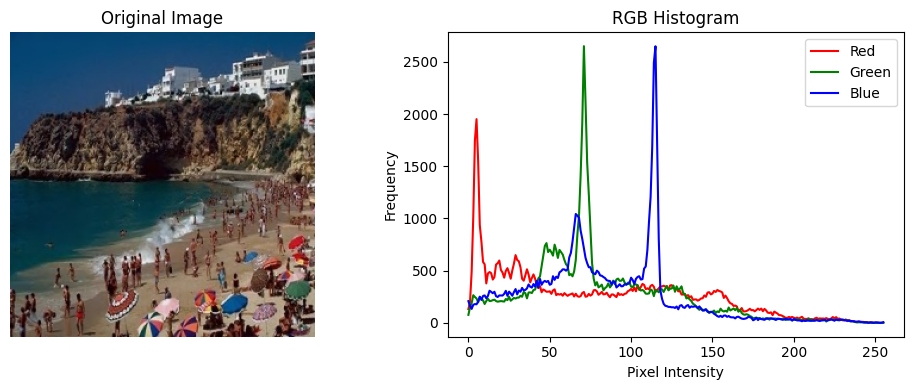

In [ ]:
import matplotlib.pyplot as plt

img_path = color_paths[0]
img = cv.imread(img_path)
img = cv.resize(img, IMG_SIZE, interpolation=cv.INTER_AREA)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

hist_r = cv.calcHist([rgb], [0], None, [256], [0,256])
hist_g = cv.calcHist([rgb], [1], None, [256], [0,256])
hist_b = cv.calcHist([rgb], [2], None, [256], [0,256])

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


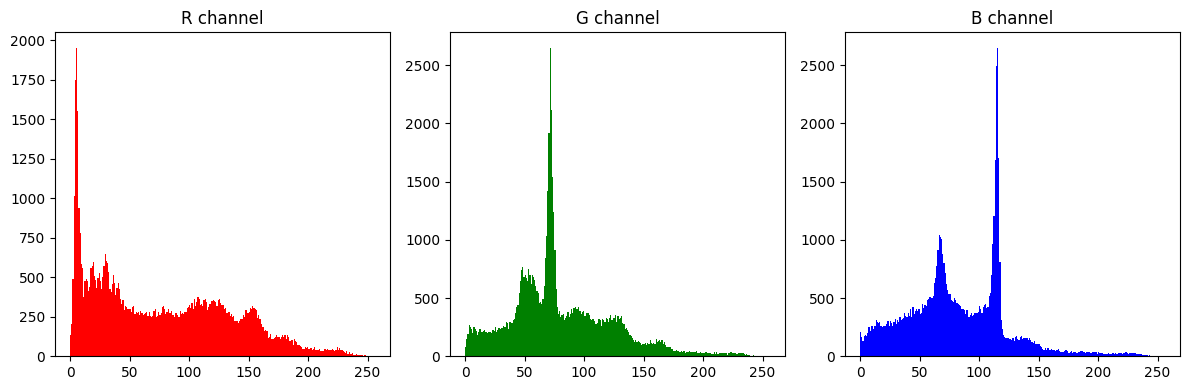

Sample path: C:/Users/miran/Downloads/Projectimage/dataset/training_set\beaches\110.jpg
Sample feature length: 512


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

sample_idx = 0

sample_path = color_paths[sample_idx]
sample_img = cv.imread(sample_path)

if sample_img is None:
    raise ValueError(f"Could not read image: {sample_path}")

sample_img = cv.resize(sample_img, IMG_SIZE, interpolation=cv.INTER_AREA)
sample_rgb = cv.cvtColor(sample_img, cv.COLOR_BGR2RGB)

R, G, B = cv.split(sample_rgb)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(R.ravel(), bins=256, range=(0,256), color='r')
plt.title("R channel")

plt.subplot(1,3,2)
plt.hist(G.ravel(), bins=256, range=(0,256), color='g')
plt.title("G channel")

plt.subplot(1,3,3)
plt.hist(B.ravel(), bins=256, range=(0,256), color='b')
plt.title("B channel")

plt.tight_layout()
plt.show()

print("Sample path:", sample_path)
print("Sample feature length:", len(color_features[sample_idx]))



## 2. Edge Features – Edge Histogram
Apply two edge detectors:

• Sobel

• Canny

• Roberts



In [ ]:
import os
import cv2 as cv
import numpy as np

dataset_path = r"C:/Users/miran/Downloads/Projectimage/dataset/training_set"
IMG_SIZE = (256, 256)

image_paths = []
gray_images = []


for cls in sorted(os.listdir(dataset_path)):
    class_dir = os.path.join(dataset_path, cls)

    if not os.path.isdir(class_dir):
        continue

    for fname in sorted(os.listdir(class_dir)):
        if fname.lower().endswith((".jpg",".jpeg",".png")):
            path = os.path.join(class_dir, fname)
            img = cv.imread(path)
            if img is None:
                continue

            # Resize + Gray
            img_resized = cv.resize(img, IMG_SIZE)
            gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)

            image_paths.append(path)
            gray_images.append(gray)

print("Total images loaded:", len(gray_images))


Total images loaded: 900


In [ ]:
def extract_sobel_hist(gray, num_bins=64):
    sx = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=3)
    sy = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=3)
    mag = np.sqrt(sx**2 + sy**2)
    mag = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    hist, _ = np.histogram(mag.ravel(), bins=num_bins, range=(0,256))
    hist = hist.astype("float32")
    hist /= (hist.sum() + 1e-7)
    return hist
def extract_canny_hist(gray):
    edges = cv.Canny(gray, 100, 200)
    hist, _ = np.histogram(edges.ravel(), bins=2, range=(0,256))
    hist = hist.astype("float32")
    hist /= (hist.sum() + 1e-7)
    return hist



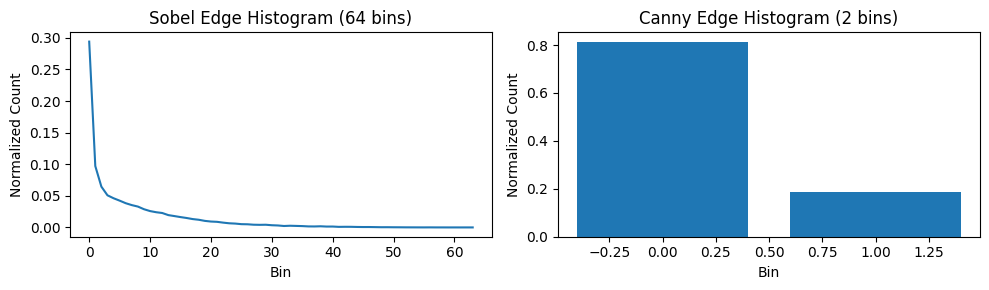

In [ ]:
idx = 0
hs = extract_sobel_hist(gray_images[idx])
hc = extract_canny_hist(gray_images[idx])

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(hs)
plt.title("Sobel Edge Histogram (64 bins)")
plt.xlabel("Bin")
plt.ylabel("Normalized Count")

plt.subplot(1,2,2)
plt.bar([0,1], hc)
plt.title("Canny Edge Histogram (2 bins)")
plt.xlabel("Bin")
plt.ylabel("Normalized Count")

plt.tight_layout()
plt.show()


In [ ]:
sobel_features = []
canny_features = []

for gray in gray_images:
    sobel_features.append(extract_sobel_hist(gray))
    canny_features.append(extract_canny_hist(gray))

sobel_features = np.array(sobel_features, dtype=np.float32)
canny_features = np.array(canny_features, dtype=np.float32)

print("Sobel features shape:", sobel_features.shape)
print("Canny features shape:", canny_features.shape)


Sobel features shape: (900, 64)
Canny features shape: (900, 2)


In [ ]:
import numpy as np
import cv2 as cv

def prewitt_mag(gray):
    kx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], np.float32)
    ky = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], np.float32)

    px = cv.filter2D(gray, cv.CV_32F, kx)
    py = cv.filter2D(gray, cv.CV_32F, ky)

    mag = np.sqrt(px**2 + py**2)
    return cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

def roberts_mag(gray):
    kx = np.array([[0,1],[-1,0]], np.float32)
    ky = np.array([[1,0],[0,-1]], np.float32)

    rx = cv.filter2D(gray, cv.CV_32F, kx)
    ry = cv.filter2D(gray, cv.CV_32F, ky)

    mag = np.sqrt(rx**2 + ry**2)
    return cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)


In [ ]:
prewitt_results = []
roberts_results = []


for gray in gray_images:
    prewitt_results.append(prewitt_mag(gray))
    roberts_results.append(roberts_mag(gray))


print(len(prewitt_results))
print(len(roberts_results))



900
900


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

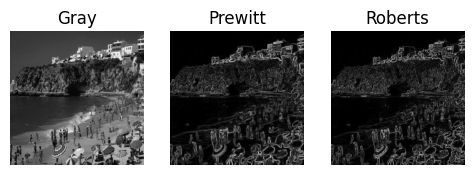

In [ ]:
import matplotlib.pyplot as plt

idx = 0

plt.figure(figsize=(10,5))

plt.subplot(1,5,1)
plt.imshow(gray_images[idx], cmap='gray')
plt.title("Gray")
plt.axis('off')


plt.subplot(1,5,2)
plt.imshow(prewitt_results[idx], cmap='gray')
plt.title("Prewitt")
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(roberts_results[idx], cmap='gray')
plt.title("Roberts")
plt.axis('off')




## 3. SIFT Feature Descriptor

![image.png](attachment:image.png)

Here is the same explanation **with the key SIFT equations included**, written clearly and formally, without emojis.

---

# SIFT Feature Extraction – Steps, Definitions, and Key Equations

## 1. Convert the image to grayscale

SIFT operates on image intensity.
The RGB image is converted to grayscale:

[
I(x,y) = 0.299R + 0.587G + 0.114B
]

This simplifies the computation and preserves the gradient information needed for SIFT.

---

## 2. Detect keypoints using the Difference-of-Gaussians (DoG)

### 2.1 Scale-space construction

SIFT creates progressively blurred versions of the image:

[
L(x,y,\sigma) = G(x,y,\sigma) * I(x,y)
]

where:

[
G(x,y,\sigma) = \frac{1}{2\pi\sigma^2} e^{-(x^2 + y^2)/(2\sigma^2)}
]

### 2.2 Difference-of-Gaussians approximation

Keypoints are detected as local extrema of:

[
D(x,y,\sigma) = L(x,y,k\sigma) - L(x,y,\sigma)
]

A point is considered a keypoint if it is a local maximum or minimum compared to its 26 neighbors across scales and space.

**Meaning:**
These points are stable and distinctive under scale and rotation changes.

---

## 3. Compute gradient magnitude and orientation around each keypoint

SIFT analyzes local gradients:

[
m(x,y) = \sqrt{(L_x)^2 + (L_y)^2}
]

[
\theta(x,y) = \arctan\left(\frac{L_y}{L_x}\right)
]

where:

* ( L_x ) and ( L_y ) are image derivatives in the x and y directions.

These gradients form orientation histograms around the keypoint.

---

## 4. Create the 128-dimensional SIFT descriptor

For each keypoint:

* The local area is divided into ( 4 \times 4 ) subregions.
* Each subregion produces an 8-bin orientation histogram.

The total descriptor length is:

[
4 \times 4 \times 8 = 128
]

This descriptor is invariant to rotation, illumination, and moderate affine changes.

---

## 5. Convert descriptors into one feature vector per image

Each image may yield many descriptors:

[
d_1, d_2, \dots, d_N \quad \text{where each } d_i \in \mathbb{R}^{128}
]

To obtain a fixed-length representation, we compute the mean descriptor:

[
f = \frac{1}{N} \sum_{i=1}^{N} d_i
]

Result:

* A single **128-dimensional** feature vector for each image.
* Suitable for CBIR pipelines (comparison, PCA, concatenation).



In [ ]:

sift = cv.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(gray, None)

print(f"Number of keypoints detected: {len(keypoints)}")

if descriptors is not None:
    print(f"Descriptor matrix shape: {descriptors.shape}")  # (N, 128)
else:
    print("No descriptors were returned.")

Number of keypoints detected: 922
Descriptor matrix shape: (922, 128)


In [ ]:
# Inspect a few feature vectors

if descriptors is not None:
    np.set_printoptions(precision=3, suppress=True)
    for i in range(min(3, len(descriptors))):
        print(f"\nDescriptor #{i} (length = {len(descriptors[i])}):\n{descriptors[i]}")


Descriptor #0 (length = 128):
[ 20.   1.   0.   1.   4.   4.  24.  54. 108.   7.   0.   0.   0.   0.
   4.  70. 161.   2.   0.   0.   0.   1.   1. 161.  46.   0.   1.  33.
  57.  27.   4.  76.  45.  16.   7.   0.   0.   1.   9.  38. 118.  39.
  27.   0.   0.   0.   1.  25. 161.  17.   1.   0.   0.   4.   3.  94.
  47.   1.   0.   0.  17.  48.   7.  32.   7.   6.   5.   0.  21.  86.
  60.  26. 136.  20.  15.   1.   4.  12.   4.  25. 161.  76.   0.   0.
   0.   1.   1.  18.  26.   6.   0.   0.   0.   2.   1.   4.   6.   0.
   0.   0. 131. 161.  27.  22.  37.   5.   0.   0.  20.  34.   5.  25.
  36.  15.   0.   0.   0.   0.   0.   5.   0.   0.   0.   0.   0.   0.
   0.   0.]

Descriptor #1 (length = 128):
[ 10.  14.   7.   2.   0.  12.  46.  38.   8.   1.   6.   5.   2.  31.
  85.  15.  25.   0.   0.   0.  15.  24. 134. 144.   1.   1.   0.   0.
 101.  76.  64.  27.  24.  76.  30.   6.   0.   1.   1.   1.  93.  29.
  37.  15.   1.   2.   3.  18. 144.  17.   0.   0.  84.  34.  15. 125.
  1

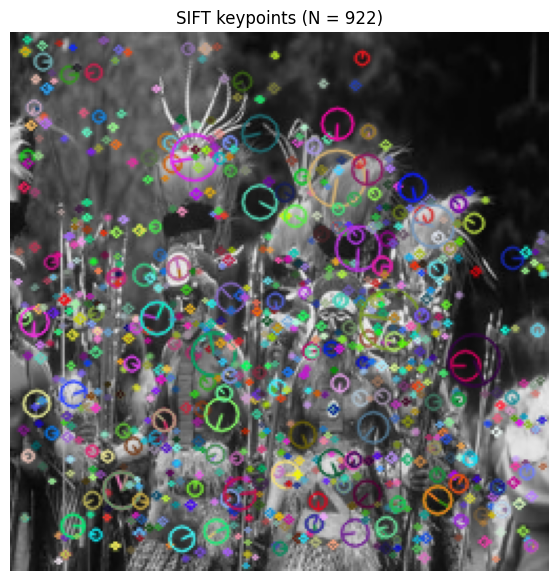

In [ ]:
# Visualize keypoints (blobs) on the image

img_kp = cv.drawKeypoints(
    gray, keypoints, None,
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(7, 7))
plt.imshow(img_kp, cmap="gray")
plt.title(f"SIFT keypoints (N = {len(keypoints)})")
plt.axis("off")
plt.show()

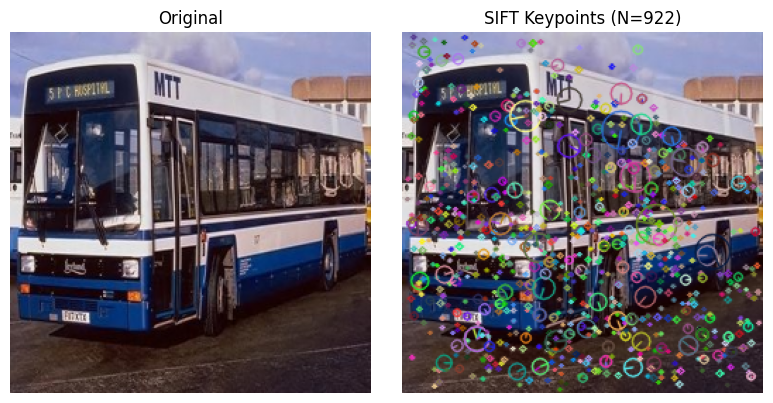

In [ ]:
kps, desc = sift.detectAndCompute(gray, None)
img_kp = cv.drawKeypoints(
    rgb_img, kps, None,
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_kp)
plt.title(f"SIFT Keypoints (N={len(kps)})")
plt.axis("off")

plt.tight_layout()
plt.show()


# 3.3 Feature Combination

After extracting all features (Color Histogram + Edge Histogram + SIFT-BoVW):

1. Concatenate the three feature vectors into one long combined feature vector.

2. Store the combined feature matrix for all images.


# SIFT Bag of Visual Words (BoVW)

## 1. Introduction

Scale-Invariant Feature Transform (SIFT) is a powerful local feature descriptor used to detect and describe distinctive points in images. However, SIFT produces a variable number of descriptors per image, which makes it unsuitable for direct comparison in content-based image retrieval (CBIR) systems.
To overcome this limitation, SIFT descriptors are converted into a fixed-length representation using the **Bag of Visual Words (BoVW)** model.

---

## 2. Motivation for Bag of Visual Words

In CBIR, each image must be represented by a feature vector of fixed dimensionality.
Since different images produce different numbers of SIFT keypoints, direct comparison is not possible.
BoVW solves this problem by:

* Quantizing local descriptors into a predefined set of visual words
* Representing each image as a histogram of these visual words

This approach is inspired by the Bag of Words model used in text retrieval.

---

## 3. SIFT Feature Extraction

For each image:

1. The image is converted to grayscale.
2. SIFT detects keypoints that are invariant to scale and rotation.
3. For each keypoint, a 128-dimensional descriptor is computed.

Each descriptor captures local gradient information around the keypoint.

Let the set of descriptors extracted from all images be:
[
D = {d_1, d_2, \dots, d_N}, \quad d_i \in \mathbb{R}^{128}
]

---

## 4. Visual Vocabulary Construction

All SIFT descriptors extracted from the dataset are pooled together and clustered using **K-Means**.

* Number of clusters: ( K )
* Each cluster center represents a **visual word**

The clustering process minimizes:
[
\sum_{i=1}^{N} \min_{k \in {1,\dots,K}} | d_i - c_k |^2
]

where:

* ( d_i ) is a SIFT descriptor
* ( c_k ) is the k-th cluster center

The resulting cluster centers form the **visual vocabulary**.

---

## 5. BoVW Histogram Encoding

For each image:

1. SIFT descriptors are assigned to the nearest visual word.
2. A histogram of size ( K ) is constructed.
3. Each bin counts how many descriptors fall into the corresponding visual word.
4. The histogram is normalized to ensure scale invariance.

The BoVW feature vector for an image is:
[
h = [h_1, h_2, \dots, h_K]
]

where ( h_k ) represents the normalized frequency of visual word ( k ).

---

## 6. Final SIFT-BoVW Representation

After histogram encoding:

* Each image is represented by a **fixed-length vector of size ( K )**
* This vector can be directly compared using distance metrics such as Euclidean or Cosine similarity

---

## 7. Integration in CBIR System

The SIFT-BoVW feature vector is concatenated with:

* RGB color histogram features
* Edge histogram features (Sobel + Canny)

to form a single combined feature vector for each image.

---

## 8. Advantages of SIFT-BoVW

* Handles variable number of keypoints
* Robust to scale, rotation, and illumination changes
* Produces fixed-length feature vectors
* Efficient for large-scale image retrieval

---

## 9. Limitations

* Ignores spatial relationships between keypoints
* Performance depends on the choice of ( K )
* Requires clustering, which can be computationally expensive

---

## 10. Conclusion

SIFT-BoVW provides an effective way to convert local SIFT descriptors into a global image representation suitable for CBIR systems. By combining robustness to image transformations with a fixed-length encoding, it enables reliable similarity comparison between images.



![image.png](attachment:image.png)

In [ ]:
all_descriptors = []

for cls in class_names:
    class_folder = os.path.join(dataset_path, cls)
    image_files = sorted([
        f for f in os.listdir(class_folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ])

    for fname in image_files:
        img_path = os.path.join(class_folder, fname)
        img = cv.imread(img_path)
        if img is None:
            continue

        img = cv.resize(img, IMG_SIZE)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        kps, desc = sift.detectAndCompute(gray, None)
        if desc is not None:
            all_descriptors.append(desc)

all_descriptors = np.vstack(all_descriptors)
print("All descriptors shape:", all_descriptors.shape)


All descriptors shape: (440689, 128)


In [ ]:
from sklearn.cluster import KMeans

K = 100
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(all_descriptors)


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",100
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [ ]:
def extract_bovw_feature(gray, sift, kmeans, K):
    kps, desc = sift.detectAndCompute(gray, None)
    hist = np.zeros(K, dtype=np.float32)

    if desc is not None:
        words = kmeans.predict(desc)
        for w in words:
            hist[w] += 1

    hist /= (hist.sum() + 1e-7)
    return hist


In [ ]:
sift_bovw_features = []

for cls in class_names:
    class_folder = os.path.join(dataset_path, cls)
    image_files = sorted([
        f for f in os.listdir(class_folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ])

    for fname in image_files:
        img_path = os.path.join(class_folder, fname)
        img = cv.imread(img_path)
        img = cv.resize(img, IMG_SIZE)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        sift_bovw_features.append(
            extract_bovw_feature(gray, sift, kmeans, K)
        )

sift_bovw_features = np.array(sift_bovw_features, dtype=np.float32)
print("SIFT-BoVW shape:", sift_bovw_features.shape)


SIFT-BoVW shape: (900, 100)


In [ ]:
edge_features = np.concatenate(
    [sobel_features, canny_features],
    axis=1
)

print("Edge features shape:", edge_features.shape)

combined_features = np.concatenate(
    [color_features, edge_features, sift_bovw_features],
    axis=1
)

print("Combined feature shape:", combined_features.shape)


Edge features shape: (900, 66)
Combined feature shape: (900, 678)


In [ ]:
np.save("combined_feature_matrix.npy", combined_features)


In [ ]:
print("Color features:", color_features.shape)
print("Edge features:", edge_features.shape)
print("SIFT-BoVW features:", sift_bovw_features.shape)
print("Combined features:", combined_features.shape)


Color features: (900, 512)
Edge features: (900, 66)
SIFT-BoVW features: (900, 100)
Combined features: (900, 678)


# 3.4 Dimensionality Reduction Using PCA

Apply PCA on the combined feature matrix:
• Reduce to 50, 100, or 150 dimensions

• Plot “explained variance vs number of components”

• Store the PCA-transformed features for use in retrieval

PCA (Principal Component Analysis) is a dimensionality reduction technique and helps us to reduce the number of features in a dataset while keeping the most important information. It changes complex datasets by transforming correlated features into a smaller set of uncorrelated components.
![image.png](attachment:image.png)


## Principal Component Analysis (PCA) — Summary

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a smaller set of new features called **principal components**, while preserving as much information (variance) as possible.

PCA relies on linear algebra, specifically **covariance**, **eigenvectors**, and **eigenvalues**, to identify the most important directions in the data.

The main idea is:

> Directions with higher variance contain more useful information.

---

## Step 1: Standardize the Data

Before applying PCA, features must be standardized because they may have different units or scales.

Each feature is transformed to have:

* Mean = 0
* Standard deviation = 1

The standardization formula is:

[
Z = \frac{X - \mu}{\sigma}
]

Where:

* ( X ) is the original feature value
* ( \mu ) is the mean of the feature
* ( \sigma ) is the standard deviation

This ensures all features contribute equally to PCA.

---

## Step 2: Compute the Covariance Matrix

PCA computes the **covariance matrix** to measure how features vary together.

The covariance between two features ( x_1 ) and ( x_2 ) is:

[
\text{cov}(x_1, x_2) = \frac{1}{n-1} \sum_{i=1}^{n} (x_{1i} - \bar{x}*1)(x*{2i} - \bar{x}_2)
]

Where:

* ( \bar{x}_1, \bar{x}_2 ) are the mean values of the features
* ( n ) is the number of samples

Interpretation:

* Positive covariance → features increase together
* Negative covariance → one increases while the other decreases
* Zero covariance → no linear relationship

---

## Step 3: Compute Eigenvectors and Eigenvalues

PCA finds the **eigenvectors** and **eigenvalues** of the covariance matrix.

They satisfy the equation:

[
A \mathbf{x} = \lambda \mathbf{x}
]

Where:

* ( A ) is the covariance matrix
* ( \mathbf{x} ) is an eigenvector
* ( \lambda ) is the corresponding eigenvalue

Meaning:

* Eigenvectors represent **directions** of maximum variance
* Eigenvalues represent **how much variance** exists along each direction

---

## Step 4: Select Principal Components

* **First Principal Component (PC1):** Direction of maximum variance
* **Second Principal Component (PC2):** Next highest variance, orthogonal to PC1
* And so on…

Principal components are ranked by descending eigenvalues.

Only the top components (e.g., 50, 100, or 150) are kept to reduce dimensionality.

---

## Step 5: Project Data onto Principal Components

The original data is projected onto the selected principal components, producing a lower-dimensional representation that retains most of the original information.

---

## Key Insight

PCA keeps the directions where the data varies the most because:

> Higher variance = more information.

By discarding low-variance directions, PCA removes noise and redundancy while simplifying the dataset.



In [ ]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


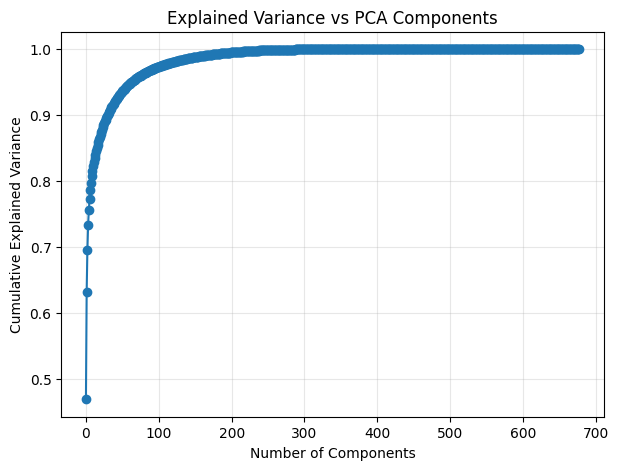

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


combined_features = np.load("combined_feature_matrix.npy")
labels = np.load("combined_labels.npy")


pca_50  = PCA(n_components=50).fit_transform(combined_features)
pca_100 = PCA(n_components=100).fit_transform(combined_features)
pca_150 = PCA(n_components=150).fit_transform(combined_features)

np.save("pca_50_features.npy", pca_50)
np.save("pca_100_features.npy", pca_100)
np.save("pca_150_features.npy", pca_150)


pca_full = PCA().fit(combined_features)


plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs PCA Components")
plt.grid(True, alpha=0.3)
plt.show()









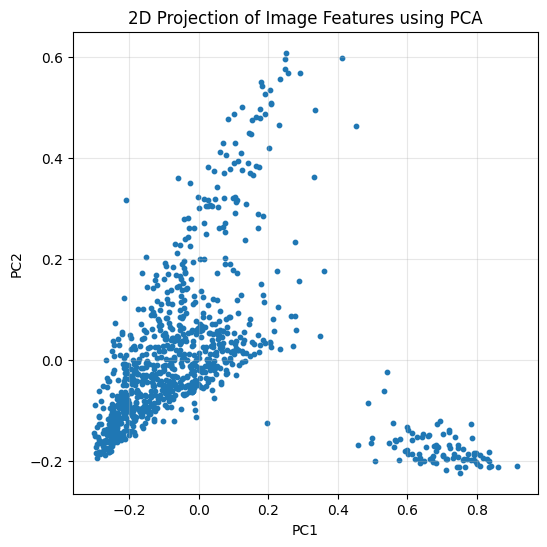

In [ ]:
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(combined_features)

plt.figure(figsize=(6,6))
plt.scatter(X_2d[:,0], X_2d[:,1], s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D Projection of Image Features using PCA")
plt.grid(True, alpha=0.3)
plt.show()


# 3.5 Similarity Measurement & Retrieval

Using the PCA-reduced features:
1. Take a query image (from the dataset or external)
2. Extract its features
3. Combine + apply PCA to the query features
4. Measure similarity between the query and dataset images using:
o Euclidean Distance, OR
o Cosine Similarity
5. Retrieve the Top 5 most similar images.

1. Take a query image (from the dataset or external)

In [ ]:
import numpy as np

db_feats = np.load("pca_100_features.npy")
image_paths = np.load("image_paths.npy", allow_pickle=True)

print(db_feats.shape, len(image_paths))
idx = 0
query_path = str(image_paths[idx])
query_vec = db_feats[idx].reshape(1, -1)

print("Query path:", query_path)
print("Query vec shape:", query_vec.shape)



(900, 100) 900
Query path: C:/Users/miran/Downloads/Projectimage/dataset/training_set\beaches\110.jpg
Query vec shape: (1, 100)


2. Extract its features
3. Combine + apply PCA to the query features

In [ ]:
pca = PCA(n_components=100)
pca.fit(combined_features)
idx = 0
query_features = combined_features[idx]
query_pca = pca.transform(query_features.reshape(1, -1))

print("Query original feature shape:", query_features.shape)
print("Query PCA feature shape:", query_pca.shape)





Query original feature shape: (678,)
Query PCA feature shape: (1, 100)


5. Retrieve the Top 5 most similar images.
 (Euclidean Distance
 OR
 Cosine Similarity)

Display the results:

• The query image

• The retrieved 5 images

• Their similarity scores

• The retrieval time


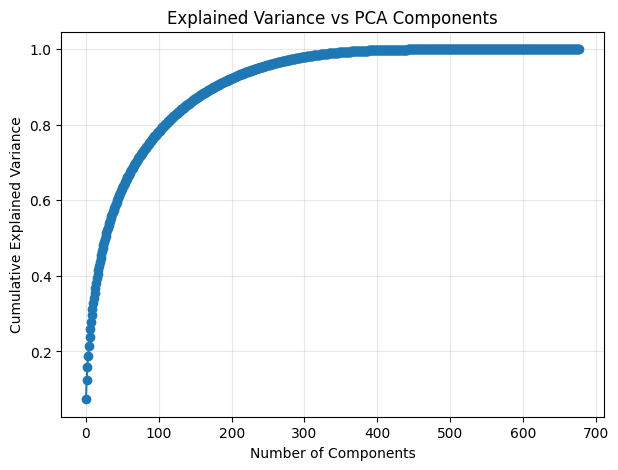

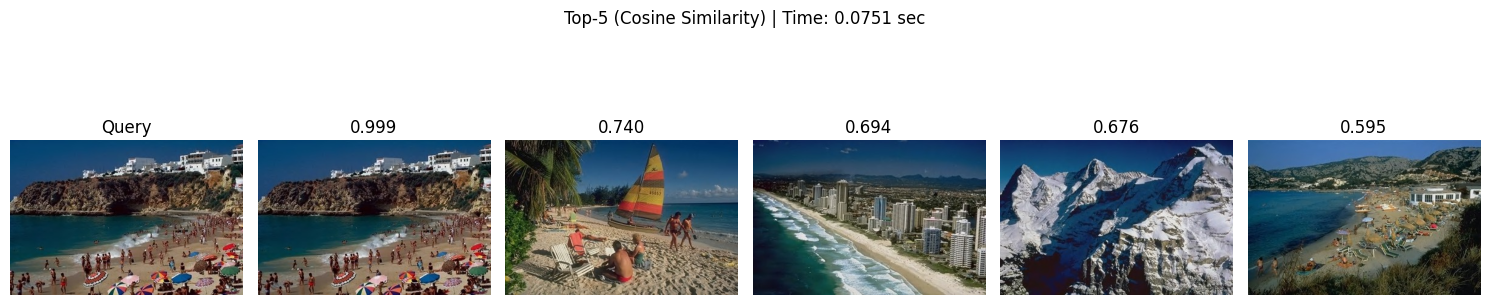

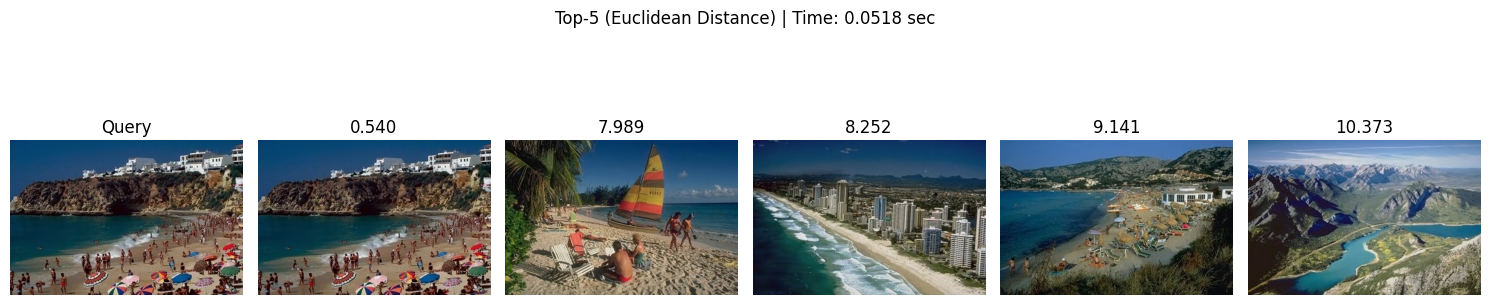

Query: C:/Users/miran/Downloads/Projectimage/dataset/training_set\beaches\110.jpg
Cosine top labels: ['beaches', 'beaches', 'beaches', 'mountains_and_snow', 'beaches']
Euclidean top labels: ['beaches', 'beaches', 'beaches', 'beaches', 'mountains_and_snow']


In [ ]:
import os
import time
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances


dataset_path = r"C:/Users/miran/Downloads/Projectimage/dataset/training_set"
IMG_SIZE = (256, 256)

BINS_PER_CHANNEL = 8
SOBEL_BINS = 64
CANNY_T1, CANNY_T2 = 100, 200

K = 100
PCA_DIM = 100


class_names = sorted([
    d for d in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, d))
])

sift = cv.SIFT_create()


def extract_rgb_histogram(img, bins=8):
    rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    hist = cv.calcHist([rgb], [0, 1, 2], None, [bins, bins, bins], [0,256, 0,256, 0,256]).flatten()
    hist = hist.astype("float32")
    hist /= (hist.sum() + 1e-7)
    return hist


def extract_sobel_hist(gray, num_bins=64):
    gx = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=3)
    gy = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=3)
    mag = np.sqrt(gx**2 + gy**2)
    mag = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    hist, _ = np.histogram(mag.ravel(), bins=num_bins, range=(0,256))
    hist = hist.astype("float32")
    hist /= (hist.sum() + 1e-7)
    return hist


def extract_canny_hist(gray):
    edges = cv.Canny(gray, CANNY_T1, CANNY_T2)
    hist, _ = np.histogram(edges.ravel(), bins=2, range=(0,256))
    hist = hist.astype("float32")
    hist /= (hist.sum() + 1e-7)
    return hist


def load_image_paths_and_labels():
    paths, labels = [], []
    for cls in class_names:
        class_folder = os.path.join(dataset_path, cls)
        image_files = sorted([
            f for f in os.listdir(class_folder)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ])
        for fname in image_files:
            p = os.path.join(class_folder, fname)
            img = cv.imread(p)
            if img is None:
                continue
            paths.append(p)
            labels.append(cls)
    return np.array(paths, dtype=object), np.array(labels, dtype=object)


image_paths, labels = load_image_paths_and_labels()
np.save("image_paths.npy", image_paths)
np.save("combined_labels.npy", labels)


all_desc = []
for p in image_paths:
    img = cv.imread(p)
    img = cv.resize(img, IMG_SIZE, interpolation=cv.INTER_AREA)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, desc = sift.detectAndCompute(gray, None)
    if desc is not None and len(desc) > 0:
        all_desc.append(desc)

all_desc = np.vstack(all_desc)

kmeans = KMeans(n_clusters=K, random_state=42, n_init="auto")
kmeans.fit(all_desc)


def extract_bovw_feature(gray, sift_obj, kmeans_obj, k):
    _, desc = sift_obj.detectAndCompute(gray, None)
    hist = np.zeros(k, dtype=np.float32)
    if desc is not None and len(desc) > 0:
        words = kmeans_obj.predict(desc)
        hist = np.bincount(words, minlength=k).astype(np.float32)
    hist /= (hist.sum() + 1e-7)
    return hist


def extract_full_feature_from_path(path):
    img = cv.imread(path)
    img = cv.resize(img, IMG_SIZE, interpolation=cv.INTER_AREA)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    hcol = extract_rgb_histogram(img, BINS_PER_CHANNEL)
    hsob = extract_sobel_hist(gray, SOBEL_BINS)
    hcan = extract_canny_hist(gray)
    hbovw = extract_bovw_feature(gray, sift, kmeans, K)

    feat = np.concatenate([hcol, hsob, hcan, hbovw]).astype(np.float32)
    return feat


combined_features = np.array([extract_full_feature_from_path(p) for p in image_paths], dtype=np.float32)
np.save("combined_feature_matrix.npy", combined_features)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_features)

pca = PCA(n_components=PCA_DIM, random_state=42)
db_feats = pca.fit_transform(X_scaled)

np.save("pca_100_features.npy", db_feats)

pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs PCA Components")
plt.grid(True, alpha=0.3)
plt.show()


def query_to_pca_vector(query_path):
    q_feat = extract_full_feature_from_path(query_path)
    q_scaled = scaler.transform(q_feat.reshape(1, -1))
    q_pca = pca.transform(q_scaled)
    return q_pca


def display_results(query_path, top_idx, scores, title, elapsed):
    plt.figure(figsize=(15,4))

    q_img = cv.cvtColor(cv.imread(query_path), cv.COLOR_BGR2RGB)
    plt.subplot(1, 6, 1)
    plt.imshow(q_img)
    plt.title("Query")
    plt.axis("off")

    for i, idx in enumerate(top_idx, start=2):
        img = cv.cvtColor(cv.imread(str(image_paths[idx])), cv.COLOR_BGR2RGB)
        plt.subplot(1, 6, i)
        plt.imshow(img)
        plt.title(f"{scores[idx]:.3f}")
        plt.axis("off")

    plt.suptitle(f"{title} | Time: {elapsed:.4f} sec")
    plt.tight_layout()
    plt.show()


def retrieve_cosine(query_path, k=5):
    t0 = time.time()
    q_pca = query_to_pca_vector(query_path)
    sim = cosine_similarity(q_pca, db_feats)[0]
    top_idx = np.argsort(sim)[-k:][::-1]
    elapsed = time.time() - t0
    display_results(query_path, top_idx, sim, "Top-5 (Cosine Similarity)", elapsed)
    return top_idx, sim, elapsed


def retrieve_euclidean(query_path, k=5):
    t0 = time.time()
    q_pca = query_to_pca_vector(query_path)
    dist = euclidean_distances(q_pca, db_feats)[0]
    top_idx = np.argsort(dist)[:k]
    elapsed = time.time() - t0
    display_results(query_path, top_idx, dist, "Top-5 (Euclidean Distance)", elapsed)
    return top_idx, dist, elapsed


idx = 0
query_path = str(image_paths[idx])

top_idx_cos, cos_scores, t_cos = retrieve_cosine(query_path, k=5)
top_idx_euc, euc_dist, t_euc = retrieve_euclidean(query_path, k=5)

print("Query:", query_path)
print("Cosine top labels:", [labels[i] for i in top_idx_cos])
print("Euclidean top labels:", [labels[i] for i in top_idx_euc])


In [ ]:
print("db_feats:", db_feats.shape)
print("combined_features:", combined_features.shape)


db_feats: (900, 100)
combined_features: (900, 678)
